In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [98]:
# Load our data
data = pd.read_csv("emails_hillary.csv")
print(data.head())

                                             content  priority
0  Nice note from Tony Lake to the Secretary rega...         2
1    Who had the lead on the nutrition event for us?         3
2  This was the written interview where you met t...         1
3  That's what my clips say. Was this taken from ...         2
4  It's on its way with the book but someone will...         2


In [99]:
# Extract features and labels
X = data['content']
y = data['priority']

In [100]:
# # Split into 80% training 10% validation 10% test data
# X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=0)
# X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=0)
# Split into 80% training 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [101]:
# Create a bag of words using CountVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

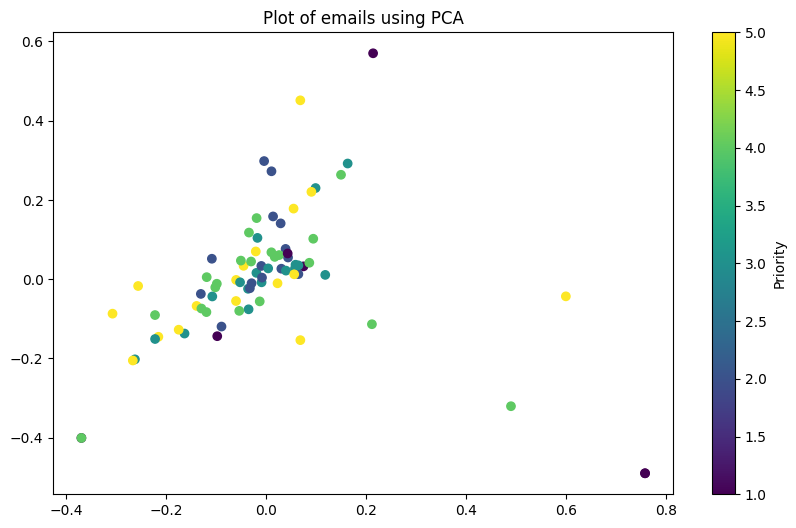

In [102]:
# Use PCA to visualize the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vectorized.toarray())
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('Plot of emails using PCA')
plt.colorbar(scatter, label='Priority')
plt.show()

In [103]:
# Train a KNN classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_vectorized, y_train)

KNeighborsClassifier(n_neighbors=3)

In [104]:
# Predict on validation data
y_pred = model.predict(X_val_vectorized)

Accuracy:  0.3125


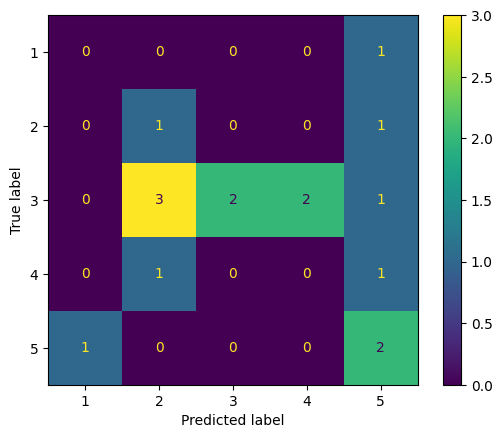

Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.20      0.50      0.29         2
           3       1.00      0.25      0.40         8
           4       0.00      0.00      0.00         2
           5       0.33      0.67      0.44         3

    accuracy                           0.31        16
   macro avg       0.31      0.28      0.23        16
weighted avg       0.59      0.31      0.32        16



In [105]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
print("Accuracy: ", accuracy)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()
plt.show()
print("Classification Report: \n", class_report)